<a href="https://colab.research.google.com/github/mabarrera12/COURSERA_DATASCIENCE/blob/master/Labsenales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Primer Punto**
Presentar una gráfica donde se muestren las señales de EEG y el trigger, marcando los momentos donde ocurre un evento. 

In [ ]:
#Paquetes python
#exec(open('packages.py').read())

In [ ]:
lim = 3000

In [ ]:
import scipy.io
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig 
import math

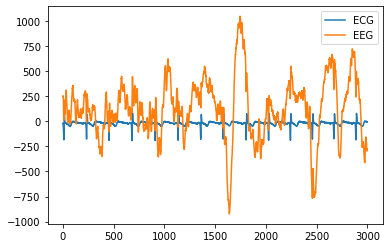

In [ ]:
#Se lee el archivo .mat
mat = scipy.io.loadmat('slp01am.mat')
V_EEG = mat['v_EEG']
V_ECG = mat['v_ECG']
V_Tri = mat['v_Tri']
S_SRate = mat['s_SRate']

plt.figure()
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(V_ECG[0, 0:lim],label='ECG')
plt.plot(V_EEG[0, 0:lim],label='EEG')
plt.legend(loc='best')

In [ ]:
length = V_EEG.size
t = np.linspace(0, length/S_SRate, length)   #v_time
t = t[:,0].transpose() #Genera un vector (x,)



*   Filtrar trigger




Text(0.5, 1.0, 'Trigger contaminado')

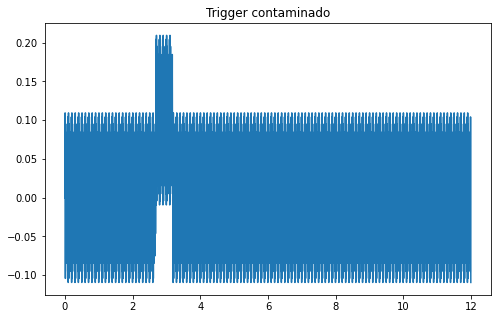

In [ ]:
#Trigger contaminado
plt.figure()
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(t[0,0:lim],V_Tri[0,0:lim]) #plot1
plt.title('Trigger contaminado')

In [ ]:
#FILTRO TRIGGER - Fourier
tri_fft = np.fft.fft(V_Tri) #v_FFT
freq = np.linspace(0, S_SRate, num = length)
freq = freq[:,0,0]

b_Remove =((freq >45) * (freq<65))
b_Remove2 = ((freq<250 -45)*(freq > 250-65))
b_Remove = b_Remove + b_Remove2

tri_fft[0,b_Remove] = 10**-10
filtro = np.fft.ifft(tri_fft) #transformada inversa

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Trigger filtrado')

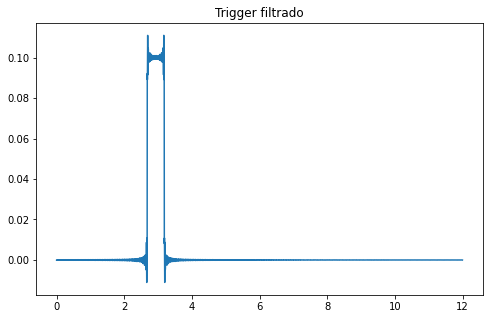

In [ ]:
plt.figure()
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(t[0,0:lim],filtro[0, 0:lim])
plt.title('Trigger filtrado')



*   Filtrar ECG



In [ ]:
  win = int(S_SRate/60)   #Ventana de procesamiento
  Filt = np.zeros(length) #Vector con resultados
  for i in range(length):
    start = math.floor(i -win/2)
    end = math.ceil(i + win/2)
    if start <0:
      start =0
    elif end >= length:
      end =length
    win_2 =V_ECG[0,start:end]
    Filt[i]=np.mean(win_2)

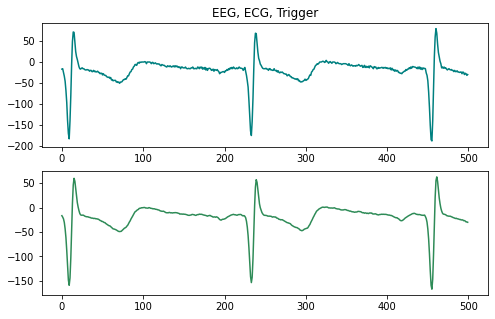

In [ ]:
plt.figure()
plt.rcParams["figure.figsize"] = (8,5)
plt.subplot(211)
plt.plot(V_ECG[0, 0:500], color ='teal', label ='ECG')
plt.title('EEG, ECG, Trigger')
plt.subplot(212)
plt.plot(Filt[0:500], color = 'seagreen', label ='ECG')

In [ ]:
V_ECG = Filt

In [ ]:
lim=1500  #Para mostrar los resultados
x= t[0,0:lim]

[Colors in python](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


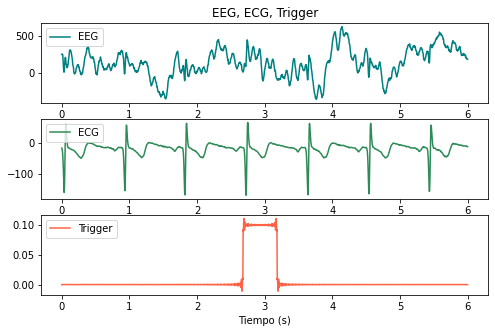

In [ ]:
plt.figure()
plt.rcParams["figure.figsize"] = (9,6)

plt.subplot(311)
plt.plot(x, V_EEG[0, 0:lim], color ='teal', label ='EEG')
plt.title('EEG, ECG, Trigger')
plt.legend(loc='upper left')
plt.subplot(312)
plt.plot(x, V_ECG[0:lim], color = 'seagreen', label ='ECG')
plt.legend(loc='upper left')
plt.subplot(313)
plt.plot(x, filtro[0, 0:lim] , color = 'tomato', label ='Trigger')
plt.xlabel('Tiempo (s)')
plt.legend(loc='upper left')

**Segundo Punto** Presentar una gráfica donde se muestren las señales de EEG y el ECG marcando los momentos donde ocurre un pico R, para esto debe utilizar el algoritmo descrito en el laboratorio para la detección de picos R. 

Text(0.5, 1.0, 'Integral de la señal')

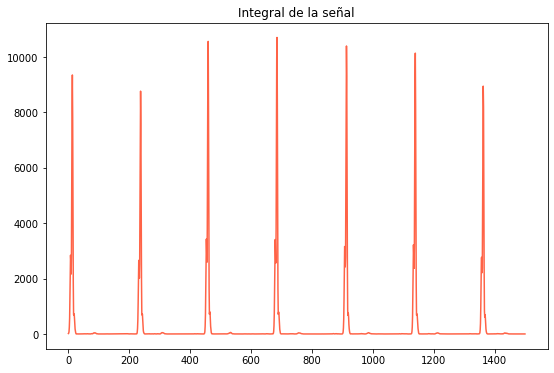

In [ ]:
#Deteccion de picos R
dif = np.zeros(length)
dif[1:] = np.diff(V_ECG)
dif[0] = dif[1]
power2 = np.power(dif,2) #Elevar a la 2

integ = np.zeros(length) #Integral movil
for i in range(length):
    start = math.floor(i -win/2)
    end = math.ceil(i + win/2)
    if start <0:
      start =0
    elif end >= length:
      end =length
    win_2 = power2[start:end]
    integ[i]=np.sum(win_2)

plt.figure()
plt.plot(integ[0:lim] , color = 'tomato', label ='Trigger')
plt.title('Integral de la señal')

Text(0.5, 1.0, 'Picos encontrados')

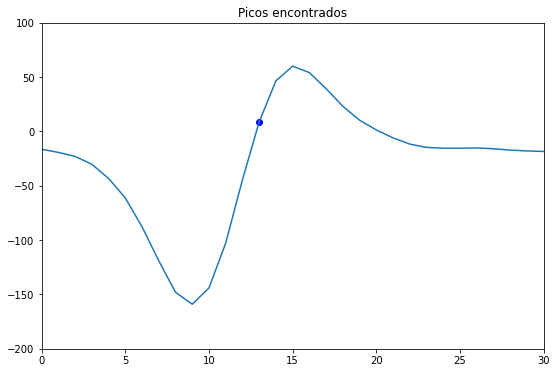

In [ ]:
h = np.std(integ)*2
dist = S_SRate*0.6 #Pulso 0.6s
peaks,_ =sig.find_peaks(integ, height= h, distance= dist)

plt.figure()
plt.plot(peaks, V_ECG[peaks], "ob")
plt.plot(V_ECG)
plt.xlim(0,30)
plt.ylim(-200,100)
plt.title('Picos encontrados')

In [ ]:
#Correccion de picos
import pdb

cont=0
win = 20
for i in peaks:
#  pdb.set_trace()
  start = math.floor(i -win/2)
  end = math.ceil(i + win/2)
  if start <0:
    start =0
  elif end >= length:
    end =length
  win_2 = V_ECG[start:end]
  peaks_2,_ = sig.find_peaks(win_2)
  if peaks_2.size==0:
    peaks = np.delete(peaks, cont)
  else:
    peaks[cont] = start + peaks_2[0]
    cont= cont+1

Text(0.5, 1.0, 'Picos encontrados')

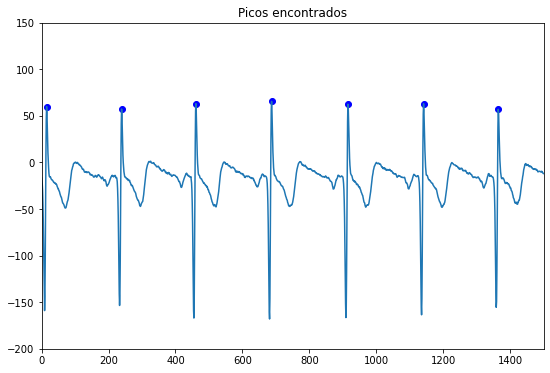

In [ ]:
plt.figure()
plt.plot(peaks, V_ECG[peaks], "ob")
plt.plot(V_ECG)
plt.xlim(0,1500)
plt.ylim(-200,150)
plt.title('Picos encontrados')

Text(0.5, 1.0, 'Picos corregidos')

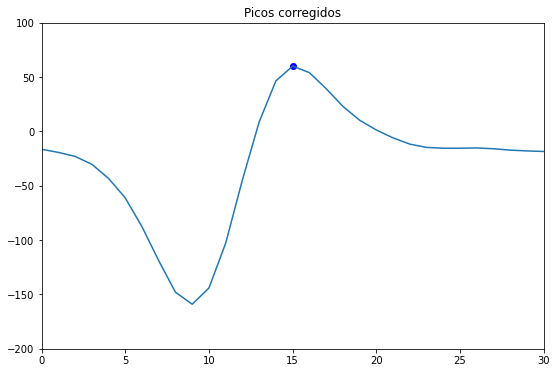

In [ ]:
plt.figure()
plt.plot(peaks, V_ECG[peaks], "ob")
plt.plot(V_ECG)
plt.xlim(0,30)
plt.ylim(-200,100)
plt.title('Picos corregidos')

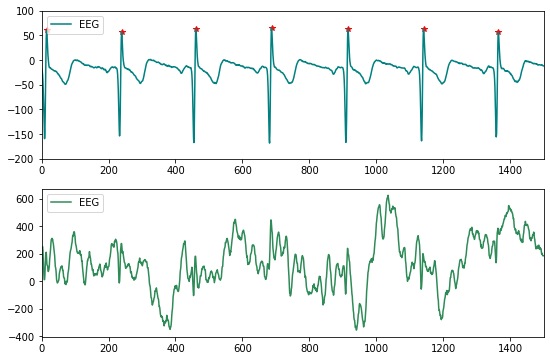

In [ ]:
#GRAFICA FINAL
plt.figure()
plt.rcParams["figure.figsize"] = (9,6)

plt.subplot(211)
plt.plot(peaks, V_ECG[peaks], "*r")
plt.plot(V_ECG, color ='teal', label ='EEG')
plt.xlim(0,lim)
plt.ylim(-200,100)
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(V_EEG[0, 0:lim], color ='seagreen', label ='EEG')
plt.xlim(0,lim)
plt.legend(loc='upper left')


In [ ]:
#np.save('V_ECG.npy', V_ECG)
np.save('Filtro.npy', filtro)
#np.save('Peaks.npy', peaks)
#d = np.load('V_ECG.npy')

**Tercer punto Punto** Presentar una gráfica donde se muestre el promedio de las señales de EEG en el momento donde ocurre un evento.

In [ ]:
# Función que manda el EEG de cada evento a la matriz final
def prom_punto3(st, en, senial):
    media = senial[0,st-90:en+90]
    return media

In [ ]:
# Parámetros que necesito para encontrar cada evento
trig_Tresh = 0.06
start = 0
end = 0
cent = True
cont=0
mat_Events= np.zeros((500,305))

In [ ]:
# Esta celda se tiene que demorar un poquito en correr.
# Si sale de una es porque no corrió y hay que darle play de nuevo.
for i in np.arange(1,np.size(filtro),1):
    if cent: 
        # Con esto encuentro cuando un evento comienza
        if np.absolute(filtro[0,i]) > trig_Tresh: 
            start = i
            cent  = False
    elif np.absolute(np.absolute(filtro[0,i]) - np.absolute(filtro[0,i-1])) > 0.05: 
        # Con esto encuentro el final de cada evento --> un cambio negativo drástico (cuya diferencia es mayor a 0.06)
        end   = i-1
        cent  = True
    if start != 0 and end != 0: 
        # Cuando ya encontré el inicio y el final de un evento, llamo a mi función que busca ese segmento en el EEG.
        mat_Events[cont,:] = prom_punto3(start,end,V_EEG)
        start = 0
        end   = 0
        cont  = cont + 1

V_EEG = mat['v_EEG']

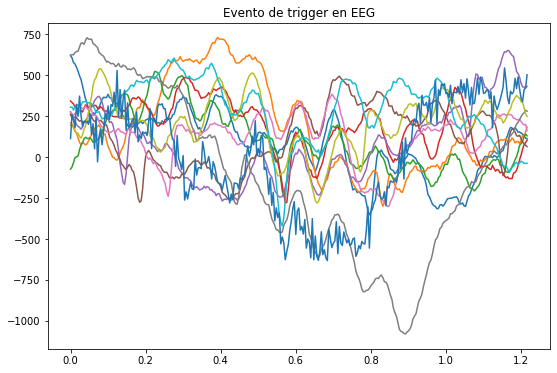

In [ ]:
# Probando que si haya cogido secciones del EEG
for i in range(11):
    plt.plot(t[0,0:305],mat_Events[12+i,:])
plt.title('Evento de trigger en EEG')
plt.rcParams["figure.figsize"] = (9,6)

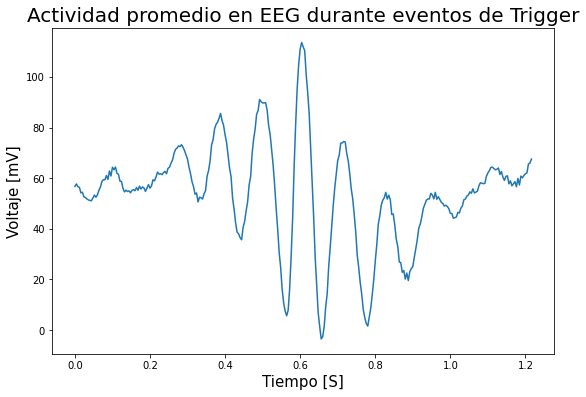

In [ ]:
# Sacando la actividad promedio del EEG para eventos 
act_media = mat_Events.mean(axis=0)
plt.figure()
plt.plot(t[0,0:305],act_media[:])
plt.ylabel("Voltaje [mV]", fontSize=15)
plt.xlabel("Tiempo [S]", fontSize=15)
plt.title("Actividad promedio en EEG durante eventos de Trigger", fontSize=20)
plt.show()

In [ ]:
# Probando gráficamente cuántos eventos detectamos

# Los eventos



**Cuarto Punto** Presentar una gráfica donde se muestre el promedio de las señales de EEG y ECG un
segundo antes y un segundo después de que ocurre el pico R.

**Quinto Punto** Sobre la gráfica del punto 4 mostrar las características de la señal

**Sexto Punto** resentar una gráfica en la cual se muestren los eventos individuales como una matriz.

**Septimo Punto** Presentar una figura en la cual se muestre la actividad tiempo frecuencia de las señales
promedio haciendo uso de la FFT

**Octavo Punto** Realice una segunda detección de picos R haciendo uso de la convolución y el promedio de
la señale de ECG, compare los resultados entre los dos métodos. 
